 # MKA-MLF, Lab_07 Convolutional Neural Networks

## Exercise - XOR Gate

## Exercise - Hand-written digits recognition

Create CNN which will process and recognize handwritten digits. For this purposes please use the MNIST database (Modified National Institute of Standards and Technology database) which is a large database of handwritten digits that is commonly used for training various image processing systems.

The datasample of the MNIST datasets can be see in the following picture

![mnist_data_sample.png](attachment:eb3e0d6a-ccb0-499d-9847-ecbc554dbce0.png)

### Task description

In the terms of machine learning, the Hand-written digits recognition can be threated as a multi-class classification problem. This is very important knowledge to structure our model in the correct way (Especially the output-layer, including the number of neurons and activations function and the overall loss function and classification metrics)

### 0. Import libraries

Import the all necessary libraries, you can get inspired by the previous exercises. You can improst the libraries gradually, when do you progressing with the task

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
###################################
# Write your own code here #



###################################
font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

### 1. Dataset

#### 1.1 Load Dataset

You can load the dataset using the following code

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


#### 1.2 Dataset examination

Using the following code, display random images,

In [ ]:
def display_random_images(x_data: np.array, y_data: np.array, count: int = 10) -> None:
  index = np.array(len(x_data))
  selected_ind = np.random.choice(index, count)

  selected_img = x_data[selected_ind]
  selected_labels = y_data[selected_ind]
  concat_img = np.concatenate(selected_img, axis=1)

  plt.figure(figsize=(20,10))
  plt.imshow(concat_img, cmap="gray")

  for id_label, label in enumerate(selected_labels):
    plt.text(14 + 28*id_label, 28*(5/4), label)
  plt.axis('off')
  plt.show()

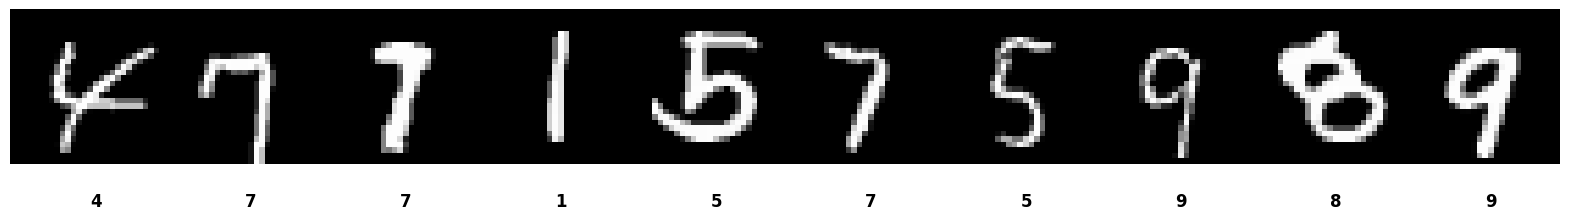

In [ ]:
display_random_images(X_train, y_train)

Examine the dataset. Answer for yourself the following questions:

- What kind of data occurs in our dataset?
Handwrite numbers
- How many data samples do we have in train and test datasets?
Train: 60000. Test: 10000
- How many colour channels does the input variable have? Black and white
- What is the size of the input images? 28x28
- What is the necessary preprocessing of the input data X? Normalize or scale the pixel values and Reshape the data
- How many classes do we have in target varoable?
- What is the necessary preprocessing of target variable y?

#### 1.3 Dataset preprocessing

Perform the necessary data preprocessing. The best way to preprocess the data would be one hot encoding for the target variable and normalization for the input variable (using min-max or z-score normalization)

In [ ]:
###################################
# Write your own code here #

# Normalize the image to a range of 0 to 1
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') /255

# Reshape the data to add a channel dimension (for CNN input)
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

# One-hot encode the labels
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

###################################

### 2. Build the model

In this section, your task will be to define the model architecture. The intial structure can be defined as follows:

Input_layer -> Convolutional_layer(kernel_size=(3,3), no_channels=32) -> Maxpooling_layer(kernel_size=(2, 2)) -> Flatten_layer -> Dense_layer (num_classes)
    
    


#### 2.1 Define the model structure

In [ ]:
model = Sequential()
###################################
# Write your own code here #

model.add(Conv2D(10, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(120,activation='relu'))
model.add(Dense(10, activation='softmax'))  # Capa de salida para clasificación en 10 clases
###################################


#### 2.2 Compile the model

Build the model, use the relevant metrics, optimizer and loss function. While choosing the metrics and loss function, consider fact that we are are trying to solve the multiclass classification problem

In [ ]:
loss = None
optimizer = None
metrics = None
learning_rate = 0.0

###################################
# Write your own code here #

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

###################################
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 10)          │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1690)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 120)                 │         202,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │           1,210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 204,230 (797.77 KB)

 Trainable params: 204,230 (797.77 KB)

 Non-trainable params: 0 (0.00 B)

### 3. Training stage

#### 3.1 Model training

train your model, define the relevant hyperparameters (no. epochs, batch_size), use 20p of the training data for validation

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=120,
    validation_data=(X_test, y_test),
    verbose=2
)

Epoch 1/10
500/500 - 20s - 39ms/step - accuracy: 0.9216 - loss: 0.2838 - val_accuracy: 0.9680 - val_loss: 0.1101
Epoch 2/10
500/500 - 20s - 40ms/step - accuracy: 0.9736 - loss: 0.0918 - val_accuracy: 0.9768 - val_loss: 0.0712
Epoch 3/10
500/500 - 23s - 45ms/step - accuracy: 0.9820 - loss: 0.0619 - val_accuracy: 0.9825 - val_loss: 0.0538
Epoch 4/10
500/500 - 18s - 36ms/step - accuracy: 0.9858 - loss: 0.0480 - val_accuracy: 0.9817 - val_loss: 0.0504
Epoch 5/10
500/500 - 18s - 37ms/step - accuracy: 0.9890 - loss: 0.0371 - val_accuracy: 0.9839 - val_loss: 0.0485
Epoch 6/10
500/500 - 19s - 38ms/step - accuracy: 0.9911 - loss: 0.0302 - val_accuracy: 0.9846 - val_loss: 0.0442
Epoch 7/10
500/500 - 17s - 34ms/step - accuracy: 0.9927 - loss: 0.0244 - val_accuracy: 0.9839 - val_loss: 0.0478
Epoch 8/10
500/500 - 20s - 41ms/step - accuracy: 0.9938 - loss: 0.0208 - val_accuracy: 0.9848 - val_loss: 0.0451
Epoch 9/10
500/500 - 17s - 34ms/step - accuracy: 0.9954 - loss: 0.0154 - val_accuracy: 0.9846 - 

#### 3.1 Model Evaluation on validation data

Plot the development of the training and validation loss, and training and validation metrics.

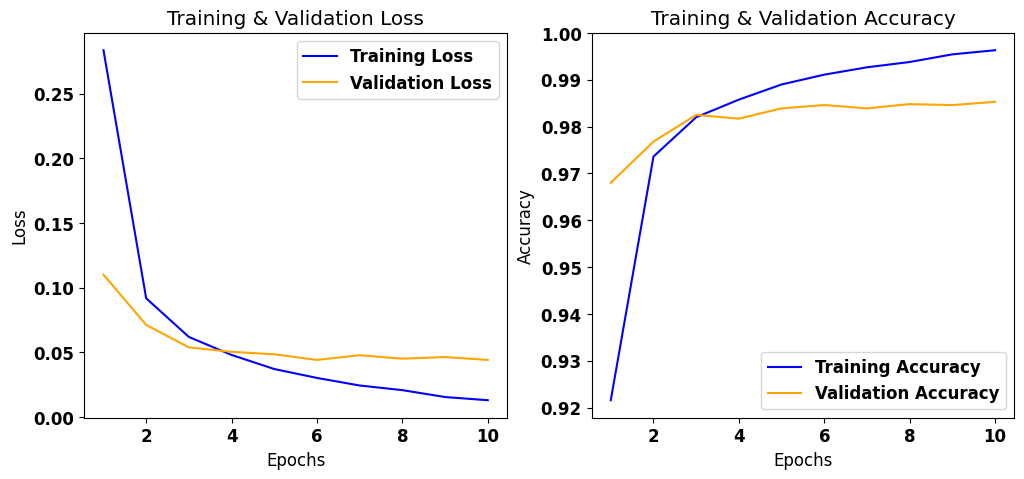

In [ ]:
###################################
# Write your own code here #

import matplotlib.pyplot as plt

# Extract loss and accuracy from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

# Plot Training & Validation Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'orange', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'orange', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.show()


###################################

### 4. Model evaluation

Evaluate the model on the testing dataset using the relevant metrics. Use the confusion metrics as the one of the metrics.

Test Loss: 0.0442
Test Accuracy: 0.9853
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.97      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



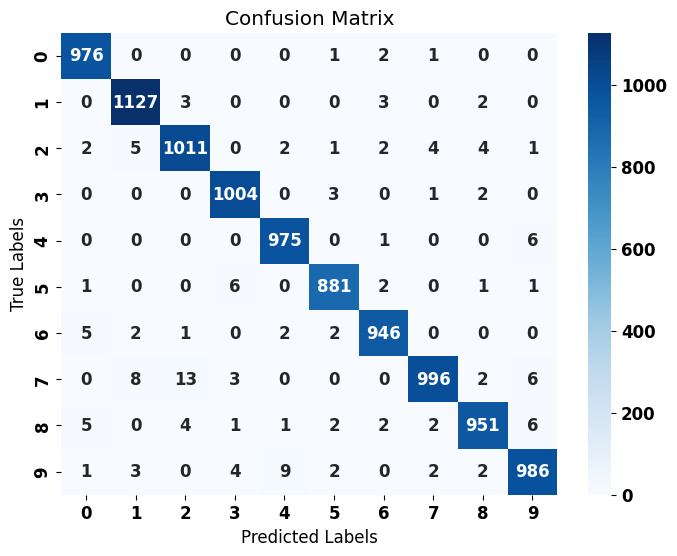

In [ ]:
###################################
# Write your own code here #
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Predict classes
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot to class labels
y_true = np.argmax(y_test, axis=1)  # Convert one-hot to class labels

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Print classification report
print("\nClassification Report:\n", classification_report(y_true, y_pred_classes))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

###################################

### 5. Hyperparameter tunning and regularization techniques

When your code is ready and fully functional, try several changes in the hyperparameters and see how they influence the testing metrics. Try changes in the network structure. You can also try adding regularization techniques such as L1, L2, and Dropout. Based on the development of training and validation loss, try to identify overfitting and avoid it